# Logistic Regression For Income prediction

### Aim: To build a Logistic Regression model that predict whether the income Prediction task is to determine whether a person makes over 50K in a year

## Lets Understand the metadata now

- age:​theageofanindividual 
     - Integer greater than 0
- workclass:​a general term to represent the employment status of an individual
			-Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
			-Without­pay, Never­worked.
- fnlwgt:​final weight. In other words, this is the number of people the census believes
		-the entry represents..
		- Integer greater than 0
- education:​the highest level of education achieved by an individual.
			- Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
			-9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool. - education­num:​the -highest level of education achieved in numerical form.
 			-Integer greater than 0
- marital­status:​marital status of an individual. Married­civ­spouse corresponds to a
			-civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
 
-Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­spouse­absent, Married­AF­spouse.
- occupation:​the general type of occupation of an individual
				-Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
				-Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, -Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces.
- relationship:​represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all
- Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried. - race:​Descriptions of an individual’s race
- White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black. - sex:​the biological sex of the individual
- Male, Female
- capital­gain:​capitalgainsforanindividual
- Integer greater than or equal to 0 - capital­loss:​capitallossforanindividual
- Integer greater than or equal to 0
- hours­per­week:​the hours an individual has reported to work per week
- continuous.
- native­country:​country of origin for an individual
- United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands.
- the label:​whether or not an individual makes more than -$50,000annually. - <=50k, >50k

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns',None)
import seaborn as sb;
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

## DataFrame Analysis and reading the data . We checked that the input dataset doesnt have column name so by analysing the metadata provided in adult.names we assign the column names to the dataset

In [2]:
df = pd.read_csv(os.getcwd()+'/adult.csv', na_values=['?'])
df.columns =['age','workclass','fnlwgt','education','education-num', 'marital-status', 'occupation', 'relationship','race', 
'sex', 'capital-gain','capital-loss','hours-per-week','native-country','income']
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16742,17,?,181337,10th,6,Never-married,?,Own-child,Other,Female,0,0,20,United-States,<=50K
19651,26,Private,557236,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
16407,21,State-gov,337766,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K
1135,46,Self-emp-not-inc,246212,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
6663,31,State-gov,181824,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,35,United-States,>50K
24729,31,Private,310773,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,40,Mexico,<=50K
5806,17,Private,221403,12th,8,Never-married,Other-service,Own-child,Black,Male,0,0,18,United-States,<=50K
5980,44,Local-gov,236321,HS-grad,9,Divorced,Transport-moving,Own-child,White,Male,0,0,25,United-States,<=50K
22809,25,Private,109390,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,70,United-States,<=50K
32138,47,Self-emp-not-inc,242391,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K


### Analysing the No. of rows and columns in dataset and the column names (Dimesions)

In [ ]:
df.shape

(32560, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Univariate analysis

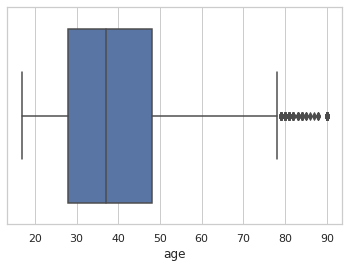

In [3]:
sb.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

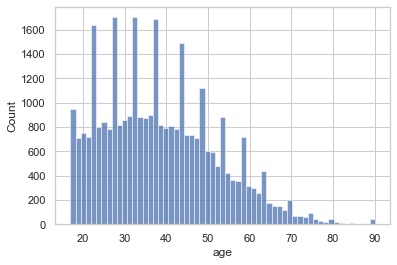

In [ ]:
sb.histplot(df['age'])

Age seems to be skewed normal distribution and has some outliers

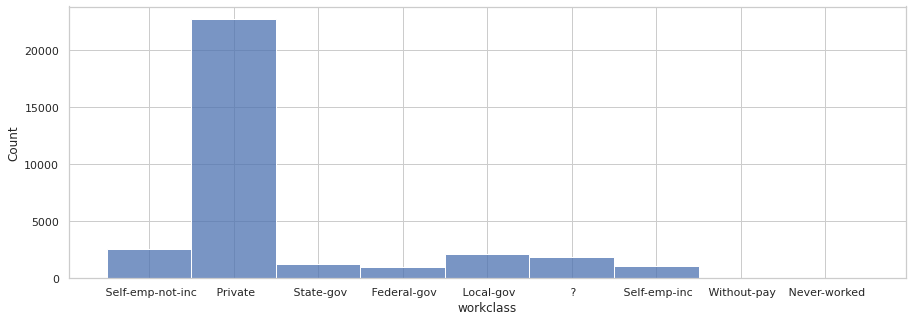

In [11]:
plt.figure(figsize=(15,5))
sb.histplot(df['workclass'])
## The column name starts with the unnecessary space, will trip at the end of EDA

Categorical values 'Private' is present in major portion of data

<AxesSubplot:ylabel='fnlwgt'>

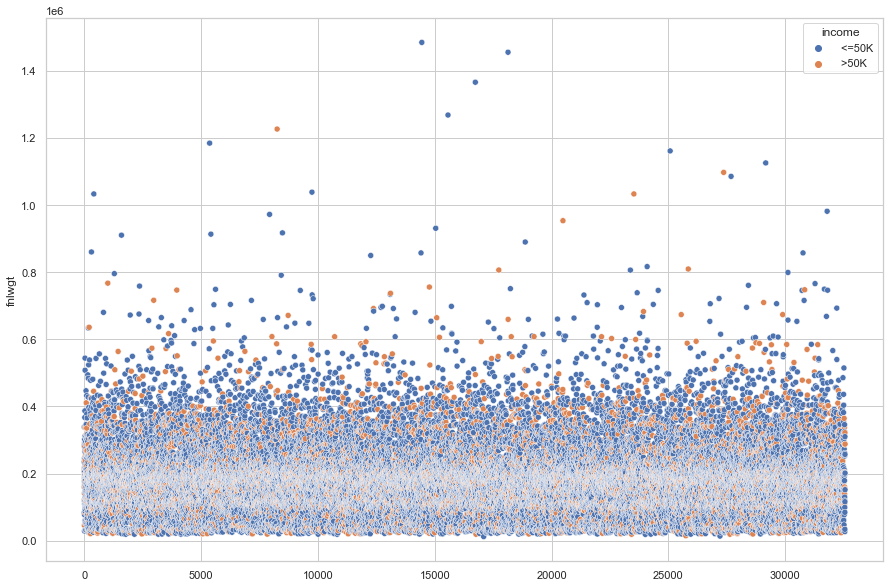

In [ ]:
plt.figure(figsize=(15,10))
sb.scatterplot(df.index, df['fnlwgt'], hue=df['income'] )

There doesnt seems to be any linear relation between independent variable 'fnlwgt' and target variable

<AxesSubplot:xlabel='education', ylabel='Count'>

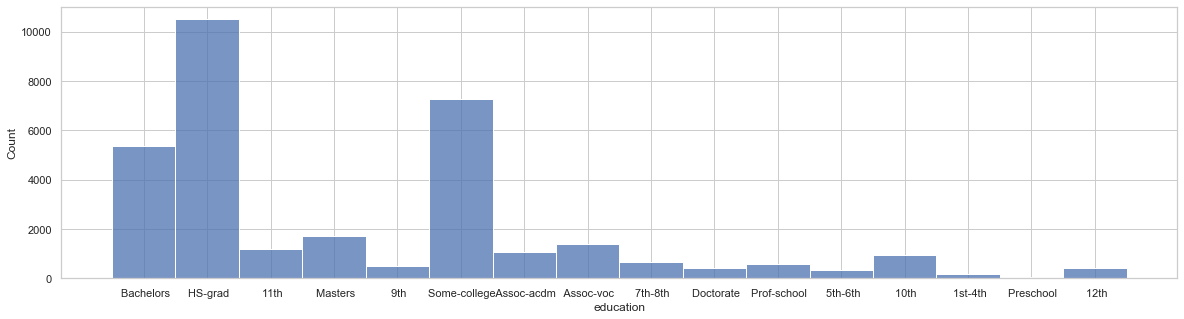

In [ ]:
plt.figure(figsize=(20,5))
sb.histplot(df['education'])
## This is a Education level of the person, will rename this at the end

There are few class values which are dominated in the dataset

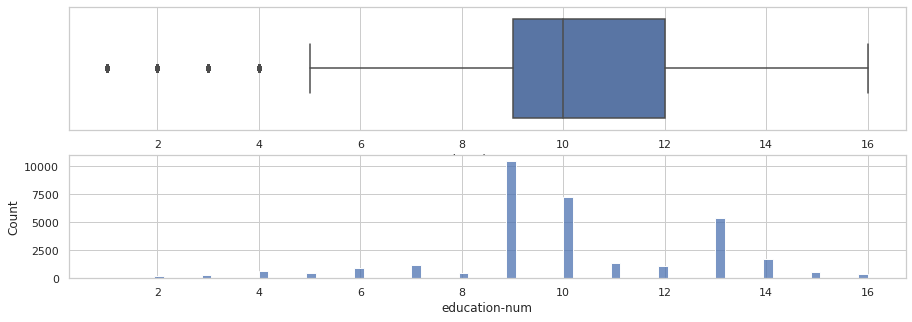

In [9]:
fig, axs = plt.subplots(2, figsize=(15,5))
sb.boxplot(df['education-num'], ax=axs[0])
sb.histplot(df['education-num'], ax=axs[1])

## highest level of education achieved in numerical form

<AxesSubplot:xlabel='marital-status', ylabel='Count'>

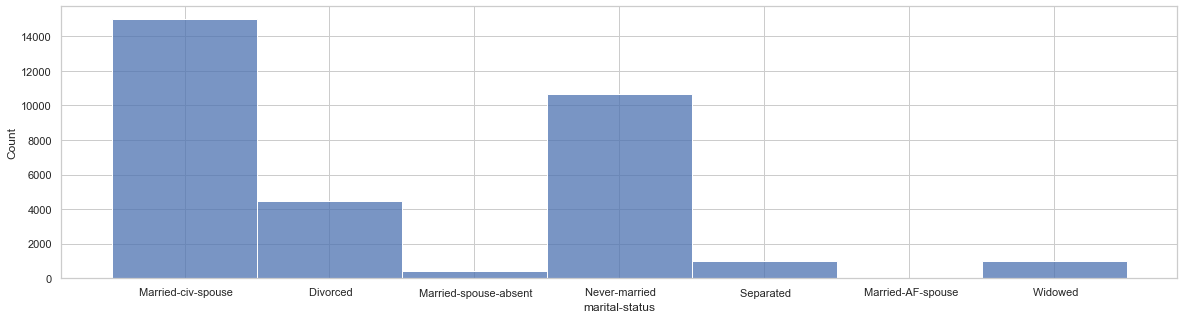

In [ ]:
plt.figure(figsize=(20,5))
sb.histplot(df['marital-status'])

We can combine the class and form may be into 2 classes as ex: married and Single  

<AxesSubplot:xlabel='occupation', ylabel='Count'>

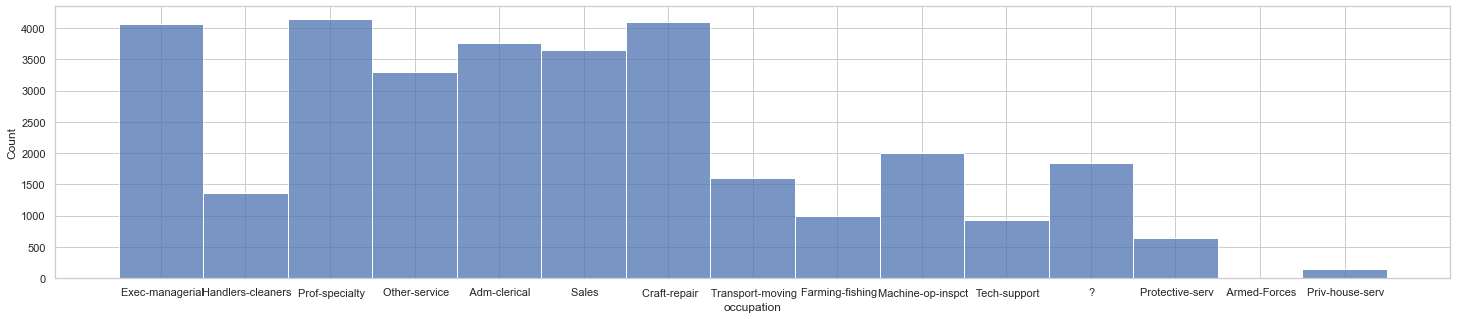

In [ ]:
plt.figure(figsize=(25,5))
sb.histplot(df['occupation'])

There seems some unknow class like '?'

<AxesSubplot:xlabel='relationship', ylabel='Count'>

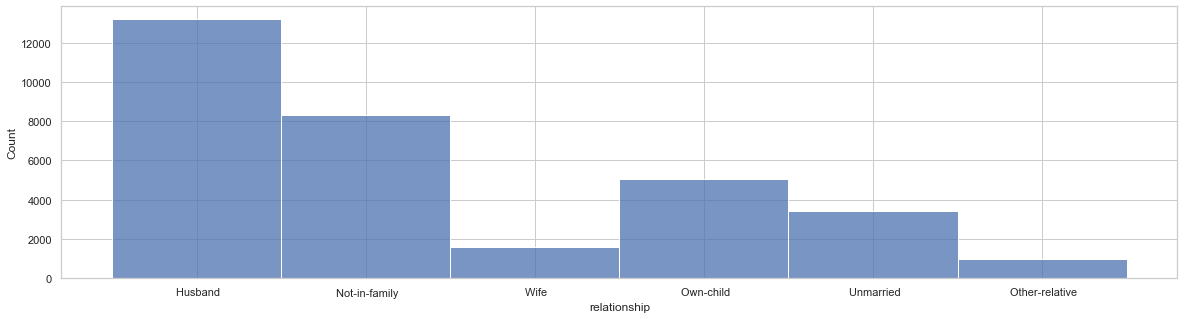

In [ ]:
plt.figure(figsize=(20,5))
sb.histplot(df['relationship'])

<AxesSubplot:xlabel='race', ylabel='Count'>

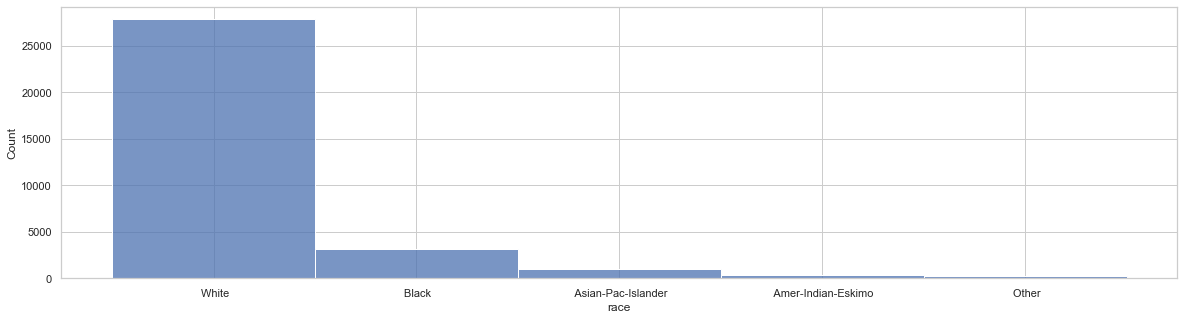

In [ ]:
plt.figure(figsize=(20,5))
sb.histplot(df['race'])

'White' class dominates the dataset

<AxesSubplot:xlabel='sex', ylabel='Count'>

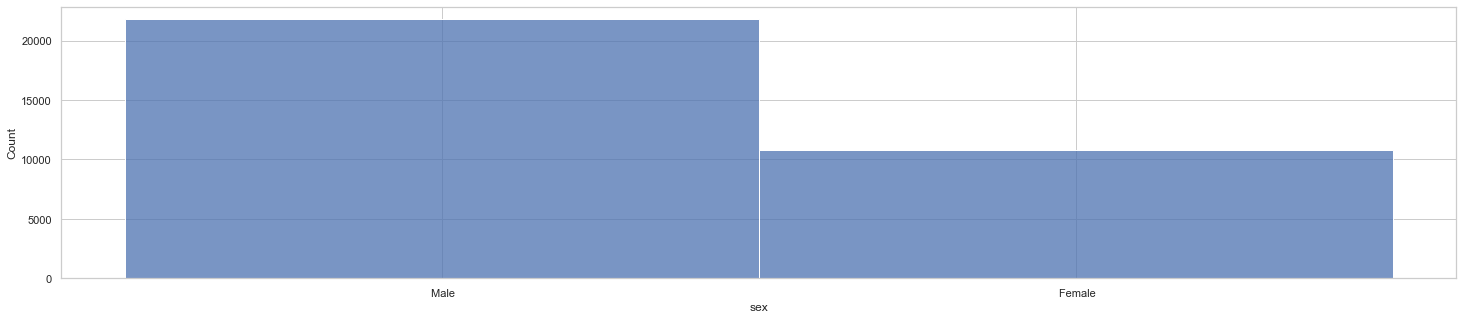

In [ ]:
plt.figure(figsize=(25,5))
sb.histplot(df['sex'])

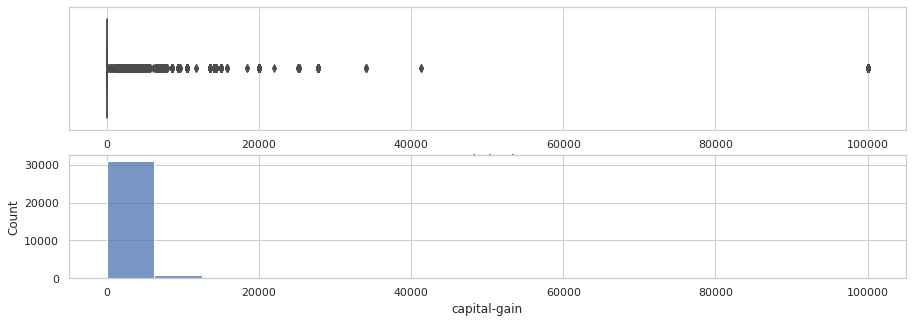

In [12]:
fig, axs = plt.subplots(2, figsize=(15,5))
sb.boxplot(df['capital-gain'], ax=axs[0])
sb.histplot(df['capital-gain'], ax=axs[1])

There seems to be some outliers. We will check the model performace, model bias vs variance analysis and later will see whether these outliers needs to be removed or not.

---



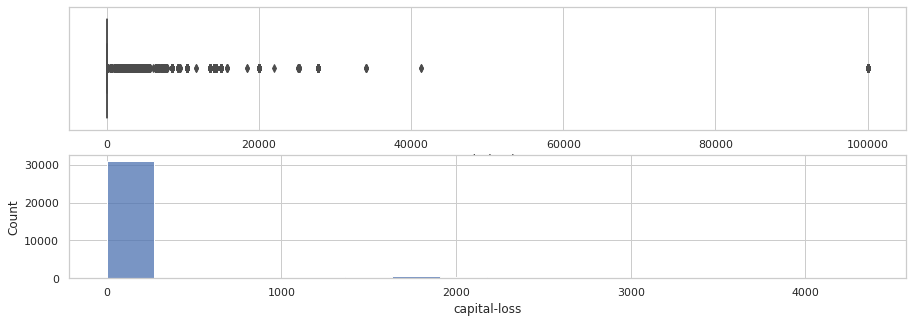

In [14]:
fig, axs = plt.subplots(2, figsize=(15,5))
sb.boxplot(df['capital-gain'], ax=axs[0])
sb.histplot(df['capital-loss'], ax=axs[1])

### Bivariate Analysis

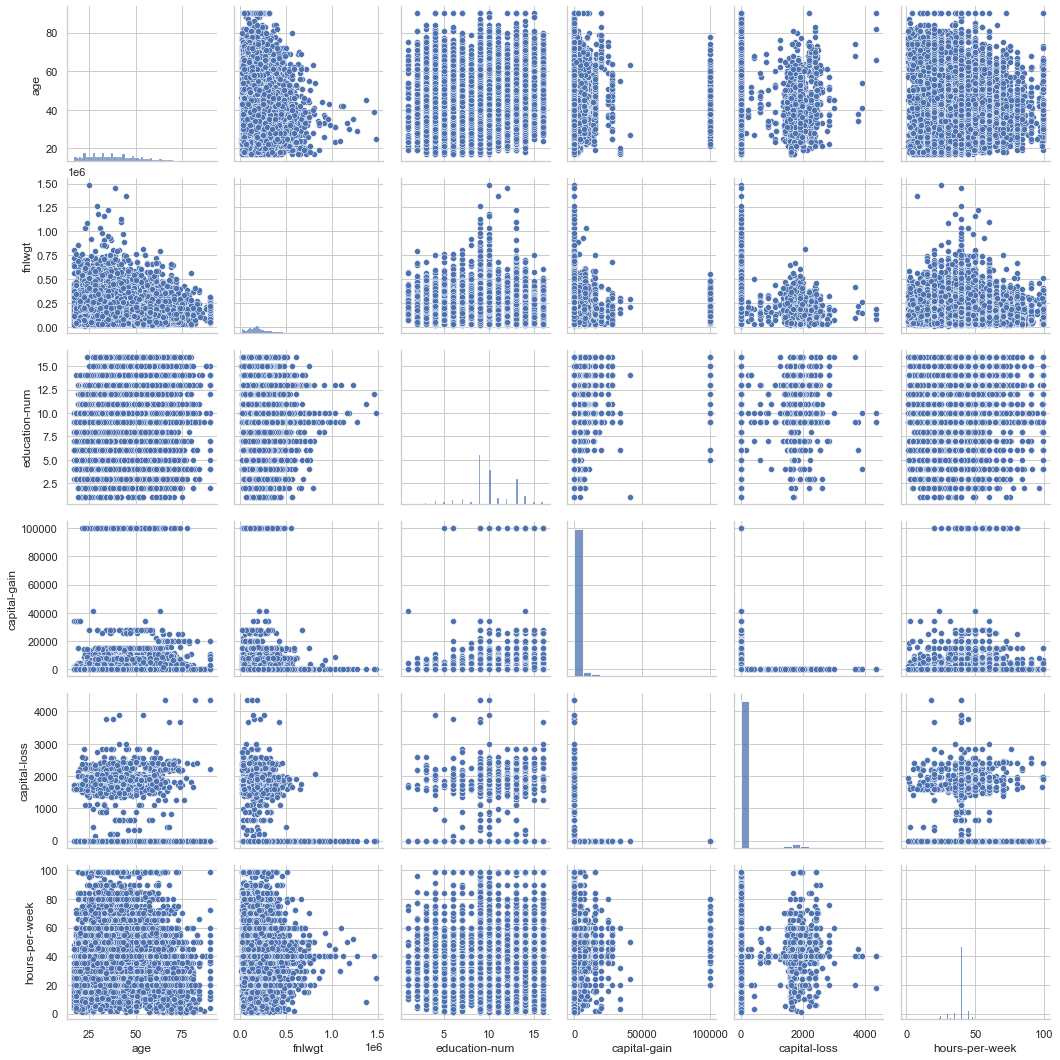

In [ ]:
sb.pairplot(df)

<AxesSubplot:xlabel='workclass', ylabel='age'>

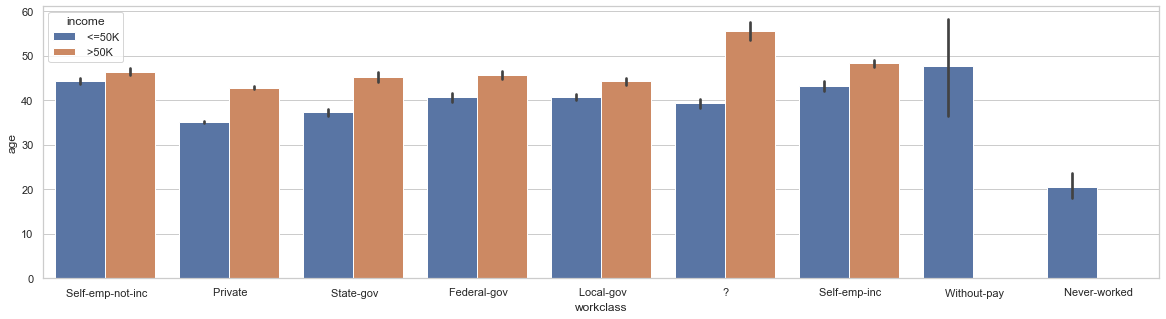

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(df['workclass'], df['age'], hue=df['income'], )

<AxesSubplot:xlabel='relationship', ylabel='age'>

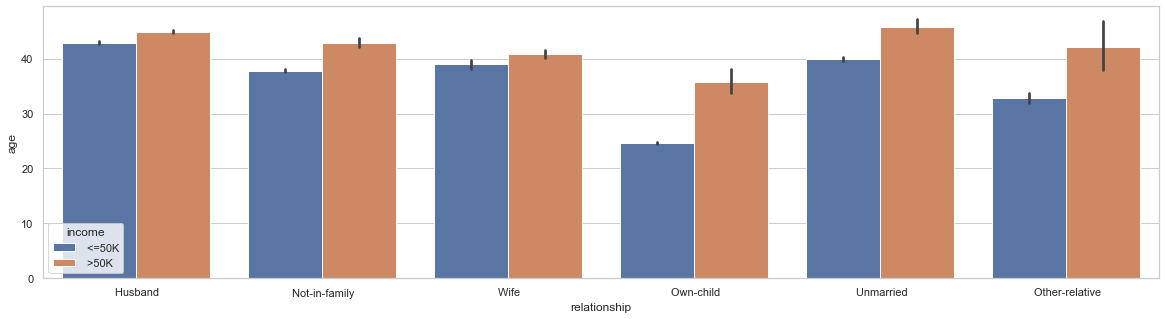

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(df['relationship'], df['age'], hue=df['income'])

<AxesSubplot:xlabel='race', ylabel='age'>

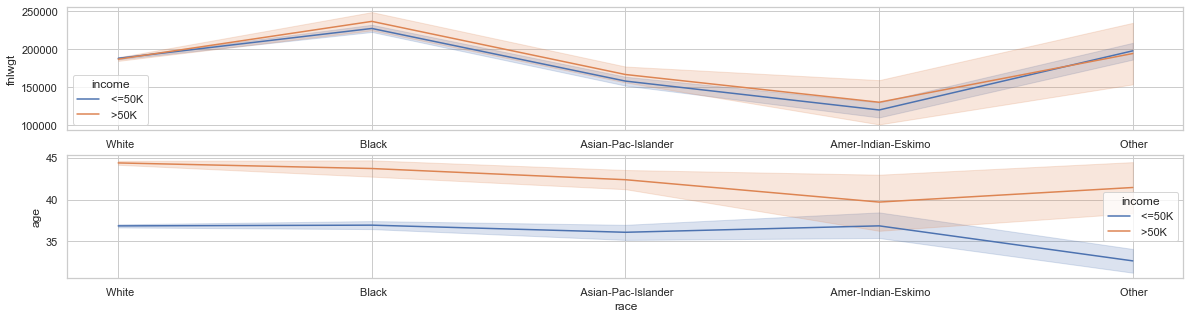

In [ ]:
fig, axs = plt.subplots(2, figsize=(20,5))
sb.lineplot(df['race'], df['fnlwgt'], hue=df['income'], ax=axs[0])
sb.lineplot(df['race'], df['age'], hue=df['income'], ax=axs[1])

<AxesSubplot:xlabel='occupation', ylabel='age'>

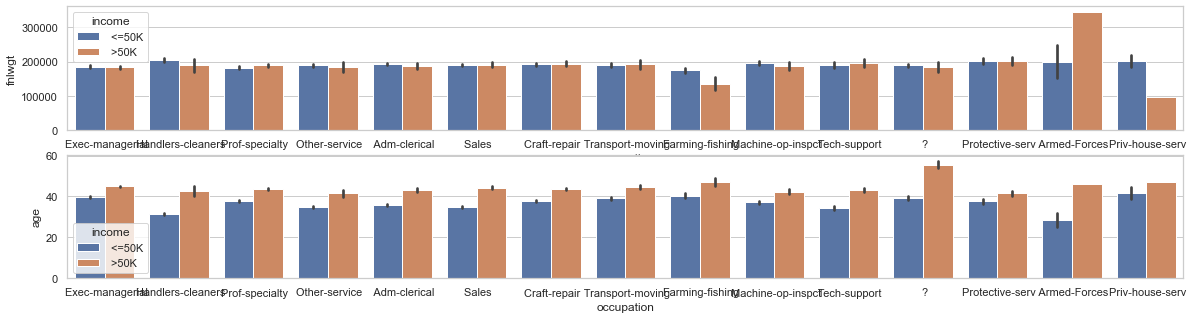

In [ ]:
fig, axs = plt.subplots(2, figsize=(20,5))
sb.barplot(df['occupation'], df['fnlwgt'], hue=df['income'], ax=axs[0])
sb.barplot(df['occupation'], df['age'], hue=df['income'], ax=axs[1])

<AxesSubplot:xlabel='marital-status', ylabel='age'>

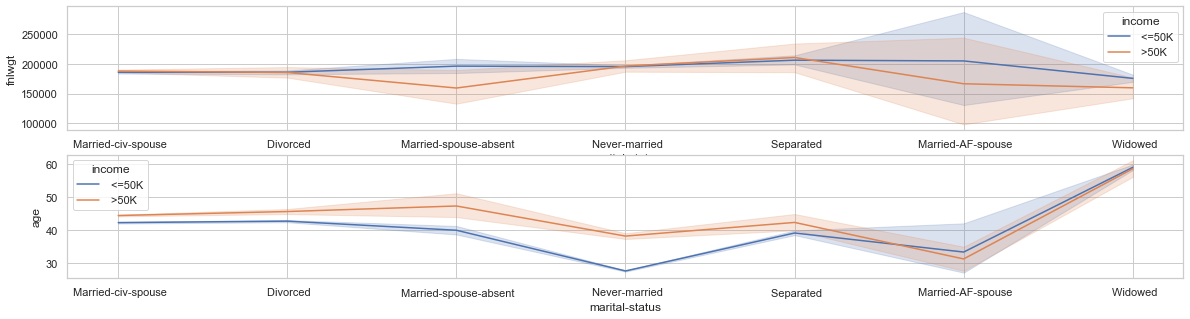

In [ ]:
fig, axs = plt.subplots(2, figsize=(20,5))
sb.lineplot(df['marital-status'], df['fnlwgt'], hue=df['income'], ax=axs[0])
sb.lineplot(df['marital-status'], df['age'], hue=df['income'], ax=axs[1])

<AxesSubplot:xlabel='education-num', ylabel='workclass'>

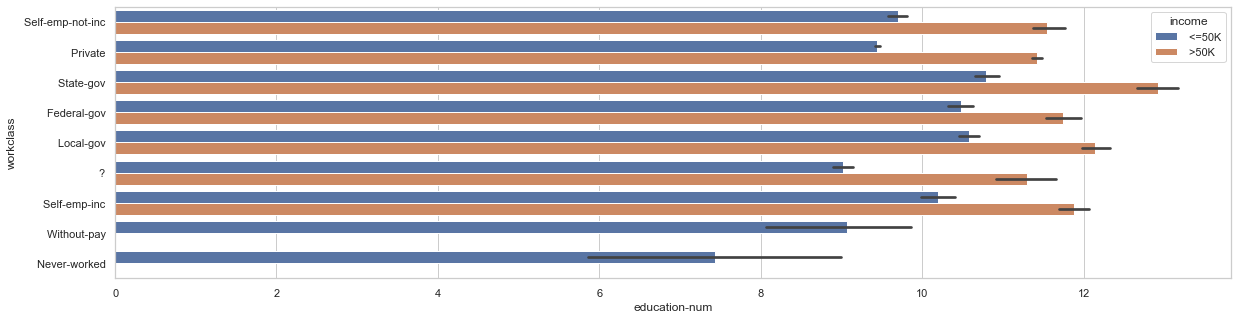

In [ ]:
fig, axs = plt.subplots(figsize=(20,5))
sb.barplot(df['education-num'], df['workclass'], hue=df['income'] )

<AxesSubplot:>

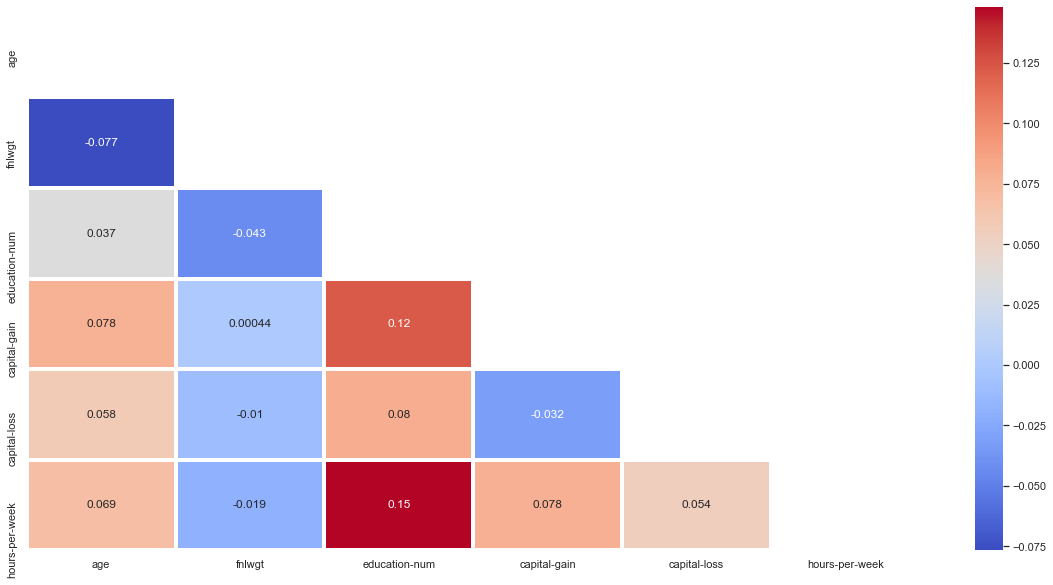

In [ ]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sb.heatmap(df.corr(), annot=True, cmap= 'coolwarm', linewidths=3, mask=matrix)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education-num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital-gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital-loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


###  Now the income column is our target variable. lets Analyze Income

In [ ]:
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [ ]:
df['income'].head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [ ]:
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

#### We can clearly see that No empty cell is available in Data

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

#### Checking the existence of Null values in Data

In [ ]:
df.isnull().sum().any()

False

#### statistics on non-numerical features.

In [ ]:
df.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [ ]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [ ]:
df['income'] = df['income'].str.strip() #removing extra spaces from data
df['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

#### Now the income column is our target so we need to be changing that
#### Greater than 50k - 1
#### Lesser than equal 50k - 0

In [ ]:
df.loc[df['income'] == '<=50K', 'income'] = 0
df.loc[df['income'] != 0, 'income'] = 1

In [ ]:
df.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,0
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [ ]:
df['income'] = df['income'].astype(int)
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [ ]:
df['income'].value_counts()

0    24719
1     7841
Name: income, dtype: int64

There are 24719 records where income <=50K and 7841 records where income is >50K in the outcome variable 'income'.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df.describe(include=['int'])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
count_no_attr = len(df[df['income']==0])
count_attr = len(df[df['income']==1])
pct_of_no_attr = count_no_attr/(count_no_attr+count_attr)
print("Percentage of <=50K income is", pct_of_no_attr*100)
pct_of_attr = count_attr/(count_no_attr+count_attr)
print("Percentage of >50K income ", pct_of_attr*100)

Percentage of <=50K income is 75.91830466830467
Percentage of >50K income  24.081695331695332


In [ ]:
df.groupby('income').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,36.783648,190345.429467,9.594927,148.670537,53.145071,38.840163
1,44.249841,188005.000000,11.611657,4006.142456,195.001530,45.473026


### Analysis from 1/0 from all Numeric Variables:
- For Income = 0 (<=50K).
    - Average 'Age' of Employees Less, 
    - Average 'Education-num' is less,
    - Average 'hours-per-week' Lesser than those who earn >50K,
    - Average 'capital Gain' is much Less

### Categorical Means For Categorical Variables:

In [ ]:
df.groupby(['income','workclass']).mean()

age         fnlwgt  education-num  \
income workclass                                                    
0       ?                 39.258359  189090.996960       9.023100   
        Federal-gov       40.624788  183854.295416      10.483871   
        Local-gov         40.704607  186743.855691      10.580623   
        Never-worked      20.571429  225989.571429       7.428571   
        Private           35.113404  193798.014944       9.446287   
        Self-emp-inc      43.206478  167051.633603      10.198381   
        Self-emp-not-inc  44.388553  172671.771051       9.697854   
        State-gov         37.277542  183538.012712      10.797669   
        Without-pay       47.785714  174267.500000       9.071429   
1       ?                 55.617801  183567.052356      11.303665   
        Federal-gov       45.711590  187391.412399      11.752022   
        Local-gov         44.254457  193175.021070      12.145867   
        Private           42.815233  189069.947411      11.428370   
        Self-emp-inc      48.249196  183073.429260      11.882637   
        Self-emp-not-inc  46.428177  182979.212707      11.552486   
        State-gov         45.209632  186039.444759      12.917847   

                          capital-gain  capital-loss  hours-per-week  
income workclass                                                      
0       ?                   159.157447     47.961702       31.428571  
        Federal-gov         173.207131     91.278438       40.093379  
        Local-gov           169.179539     79.185637       39.739837  
        Never-worked          0.000000      0.000000       28.428571  
        Private             137.458242     49.941014       38.802290  
        Self-emp-inc        177.941296     54.368421       47.135628  
        Self-emp-not-inc    220.794717     62.629609       43.517336  
        State-gov           135.573093     40.143008       37.102754  
        Without-pay         487.857143      0.000000       32.714286  
1       ?                  4462.109948    170.989529       36.146597  
        Federal-gov        1881.088949    145.592992       43.420485  
        Local-gov          2581.126418    183.220421       43.956240  
        Private            3575.285110    187.441870       45.500907  
        Self-emp-inc       8606.705788    235.172026       50.154341  
        Self-emp-not-inc   6065.330110    252.158840       46.691989  
        State-gov          2211.475921    198.787535       44.186969

In [ ]:
df.groupby(['income','education']).mean()

age         fnlwgt  education-num  capital-gain  \
income education                                                              
0       10th          36.510907  196755.117107            6.0    135.154994   
        11th          31.765022  196349.593722            7.0     85.787444   
        12th          30.952500  198153.130000            8.0     79.075000   
        1st-4th       45.925926  239657.265432            2.0     83.080247   
        5th-6th       42.690852  235683.451104            3.0     99.504732   
        7th-8th       48.163366  188927.740924            4.0    173.485149   
        9th           40.630390  204506.583162            5.0    134.453799   
        Assoc-acdm    35.962594  194091.038653           12.0    110.389027   
        Assoc-voc     37.142018  181821.534770           11.0    196.825661   
        Bachelors     36.272582  186758.945420           13.0    162.259815   
        Doctorate     45.158879  179209.542056           16.0    220.485981   
        HS-grad       37.826762  190402.221391            9.0    153.878541   
        Masters       42.291885  177683.837696           14.0    285.774869   
        Preschool     42.764706  235889.372549            1.0    898.392157   
        Prof-school   43.718954  187208.300654           15.0    186.954248   
        Some-college  33.778794  187238.682927           10.0    125.684621   
1       10th          50.338710  197919.080645            6.0   4189.483871   
        11th          43.333333  168511.566667            7.0   2618.116667   
        12th          44.696970  210544.515152            8.0   2769.090909   
        1st-4th       52.000000  229737.833333            2.0   1281.333333   
        5th-6th       46.750000  168352.562500            3.0   1692.000000   
        7th-8th       52.725000  175223.350000            4.0   1149.825000   
        9th           48.814815  166022.888889            5.0   4087.222222   
        Assoc-acdm    41.675472  191405.641509           12.0   2244.430189   
        Assoc-voc     42.545706  182259.800554           11.0   2180.725762   
        Bachelors     42.618190  189935.223773           13.0   4004.705088   
        Doctorate     48.591503  189317.539216           16.0   6361.039216   
        HS-grad       45.022090  184988.835821            9.0   2805.281194   
        Masters       45.450469  181579.946820           14.0   4376.397289   
        Prof-school   45.118203  185105.023641           15.0  14113.711584   
        Some-college  44.173756  195145.971882           10.0   2612.822639   

                      capital-loss  hours-per-week  
income education                                    
0       10th             37.167623       36.574053  
        11th             41.613453       33.322870  
        12th             30.385000       35.035000  
        1st-4th          50.117284       37.864198  
        5th-6th          65.744479       38.539432  
        7th-8th          60.488449       38.830033  
        9th              22.229979       37.667351  
        Assoc-acdm       64.000000       39.264339  
        Assoc-voc        47.919687       40.817826  
        Bachelors        59.731248       40.586339  
        Doctorate        46.065421       45.429907  
        HS-grad          53.642987       39.727510  
        Masters          79.301047       41.223822  
        Preschool        66.490196       36.647059  
        Prof-school      93.385621       42.816993  
        Some-college     51.200203       37.450203  
1       10th            333.290323       43.774194  
        11th            207.400000       45.133333  
        12th             56.000000       44.818182  
        1st-4th           0.000000       48.833333  
        5th-6th         117.937500       46.000000  
        7th-8th         144.150000       47.500000  
        9th             151.074074       44.851852  
        Assoc-acdm      182.452830       44.256604  
        Assoc-voc       142.994460       4

In [ ]:
df.groupby(['income','marital-status']).mean()

age         fnlwgt  education-num  \
income marital-status                                                    
0       Divorced               42.738693  185846.659045       9.815075   
        Married-AF-spouse      33.384615  204899.692308       9.538462   
        Married-civ-spouse     42.287422  185849.843433       9.347055   
        Married-spouse-absent  39.981771  196143.945312       9.062500   
        Never-married          27.664900  195352.726425       9.838485   
        Separated              39.148071  206153.227320       9.095933   
        Widowed                59.012115  175523.473568       8.910793   
1       Divorced               45.645788  185425.691145      11.881210   
        Married-AF-spouse      31.300000  166411.200000      11.000000   
        Married-civ-spouse     44.436192  187893.779737      11.525852   
        Married-spouse-absent  47.323529  159234.735294      12.088235   
        Never-married          38.217923  196258.124236      12.529532   
        Separated              42.348485  210674.075758      12.166667   
        Widowed                58.588235  159583.705882      11.047059   

                               capital-gain  capital-loss  hours-per-week  
income marital-status                                                      
0       Divorced                 140.544724     56.079146       40.538191  
        Married-AF-spouse        204.076923      0.000000       40.000000  
        Married-civ-spouse       219.249517     60.611540       41.653790  
        Married-spouse-absent    106.559896     48.312500       39.192708  
        Never-married             98.848886     45.768031       36.470513  
        Separated                117.190824     46.100104       38.825860  
        Widowed                  149.811674     65.207048       32.172907  
1       Divorced                5781.812095    137.853132       47.336933  
        Married-AF-spouse        729.800000      0.000000       42.600000  
        Married-civ-spouse      3678.163927    198.975194       45.303945  
        Married-spouse-absent   6836.647059    164.705882       45.058824  
        Never-married           6137.576375    188.971487       46.678208  
        Separated               6614.727273    232.621212       46.212121  
        Widowed                 5071.117647    234.129412       41.600000

In [ ]:
df.groupby(['income','occupation']).mean()

age         fnlwgt  education-num  \
income occupation                                                    
0       ?                  39.179177  189247.346852       9.016344   
        Adm-clerical       35.986205  192891.876150      10.015635   
        Armed-Forces       28.250000  199302.250000       9.625000   
        Craft-repair       37.659621  191657.759937       8.911041   
        Exec-managerial    39.609152  184837.102955      10.838894   
        Farming-fishing    40.445961  174844.003413       8.425484   
        Handlers-cleaners  31.462617  205426.799065       8.453271   
        Machine-op-inspct  37.048516  196050.591324       8.362443   
        Other-service      34.664661  188806.862571       8.717226   
        Priv-house-serv    41.689189  201804.986486       7.324324   
        Prof-specialty     37.942569  182426.587900      12.378343   
        Protective-serv    37.705479  202127.566210       9.842466   
        Sales              34.780277  190869.004124       9.904012   
        Tech-support       34.355039  190725.413953      10.871318   
        Transport-moving   39.120595  189970.879405       8.653093   
1       ?                  55.617801  183567.052356      11.303665   
        Adm-clerical       43.254438  186810.232742      10.737673   
        Armed-Forces       46.000000  344415.000000      14.000000   
        Craft-repair       43.712594  193752.881593       9.792250   
        Exec-managerial    44.898374  183962.974085      12.099593   
        Farming-fishing    47.060870  134618.747826      10.008696   
        Handlers-cleaners  42.662791  188926.383721       9.360465   
        Machine-op-inspct  42.388000  187964.804000       9.364000   
        Other-service      41.518248  184034.875912      10.218978   
        Priv-house-serv    47.000000   97883.000000      13.000000   
        Prof-specialty     43.677246  188818.145239      13.551372   
        Protective-serv    41.545024  201858.085308      10.895735   
        Sales              44.336724  190931.711089      11.373347   
        Tech-support       43.102473  195227.321555      11.268551   
        Transport-moving   44.496875  191944.550000       9.221875   

                           capital-gain  capital-loss  hours-per-week  
income occupation                                                      
0       ?                    158.483051     47.758475       31.415860  
        Adm-clerical         135.996934     51.396689       37.031576  
        Armed-Forces           0.000000      0.000000       40.750000  
        Craft-repair         147.991483     66.569716       41.607256  
        Exec-managerial      184.039085     59.199237       42.810772  
        Farming-fishing      265.142207     43.268487       46.045506  
        Handlers-cleaners    110.855140     35.895639       37.626947  
        Machine-op-inspct    156.160388     48.395548       40.383562  
        Other-service         80.453452     34.113046       34.339455  
        Priv-house-serv      111.229730     21.594595       32.871622  
        Prof-specialty       191.931609     66.034196       40.110478  
        Protective-serv      245.623288     46.394977       41.579909  
        Sales                134.014998     61.778778       38.329959  
        Tech-support         196.334884     53.198450       38.556589  
        Transport-moving     129.480031     64.256069       43.624902  
1       ?                   4462.109948    170.989529       36.146597  
        Adm-clerical        2808.587771    121.378698       40.942801  
        Armed-Forces           0.000000   1887.000000       40.000000  
        Craft-repair        2360.839612    163.178687       44.682454  
        Exec-managerial     4478.821646    223.738313       47.308435  
        Farming-fishing     3070.678261    214.469565       54.208696  
        Handlers-cleaners   2448.104651    191.058140       42.732558  
        Machine-op-inspct   1537.772000    154.988000       43.3

In [ ]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df.groupby(['income','relationship']).mean()

age         fnlwgt  education-num  capital-gain  \
income relationship                                                             
0       Husband         42.922062  186117.931821       9.339794    206.474089   
        Not-in-family   37.821160  191076.035714      10.092642    136.707304   
        Other-relative  32.816737  206376.180085       8.711864    162.296610   
        Own-child       24.680664  193300.560688       9.463907     77.067187   
        Unmarried       39.918835  191398.300496       9.491636    117.784387   
        Wife            38.930741  180628.761847       9.560146    286.589307   
1       Husband         44.920750  188251.217810      11.539371   3747.914329   
        Not-in-family   42.912383  191749.684579      12.252336   6019.816589   
        Other-relative  42.027027  171474.891892      10.702703   3272.297297   
        Own-child       35.820896  183833.850746      11.149254   6021.626866   
        Unmarried       45.848624  187131.981651      11.871560   5448.756881   
        Wife            40.857718  183198.063087      11.460403   3176.765101   

                        capital-loss  hours-per-week  
income relationship                                   
0       Husband            60.867216       42.393677  
        Not-in-family      64.937701       39.885741  
        Other-relative     38.572034       36.783898  
        Own-child          38.379324       33.130174  
        Unmarried          33.425341       38.619269  
        Wife               61.948967       35.888214  
1       Husband           201.967895       46.242481  
        Not-in-family     166.429907       46.773364  
        Other-relative    376.891892       42.675676  
        Own-child         124.044776       43.656716  
        Unmarried         160.509174       46.266055  
        Wife              179.932886       37.936913

In [ ]:
df.groupby(['income','sex']).describe()

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
income sex                                                                    
0       Female   9592.0  36.210801  14.256801  17.0  24.0  34.0  46.0  90.0   
        Male    15127.0  37.146890  13.856563  17.0  26.0  35.0  46.0  90.0   
1       Female   1179.0  42.125530  10.460104  19.0  34.0  41.0  49.0  90.0   
        Male     6662.0  44.625788  10.485469  19.0  37.0  44.0  51.0  90.0   

                 fnlwgt                                                    \
                  count           mean            std      min        25%   
income sex                                                                  
0       Female   9592.0  185999.381359  103441.977591  12285.0  117491.25   
        Male    15127.0  193101.249752  108278.551364  13769.0  117721.00   
1       Female   1179.0  183687.406277   99217.678731  19700.0  116459.00   
        Male     6662.0  188769.101321  103107.315990  14878.0  119615.00   

                                               education-num             \
                     50%        75%        max         count       mean   
income sex                                                                
0       Female  176321.0  229456.00  1484705.0        9592.0   9.820475   
        Male    181705.0  243922.00  1455435.0       15127.0   9.451907   
1       Female  172274.0  221731.00   953588.0        1179.0  11.787108   
        Male    176740.0  233186.75  1226583.0        6662.0  11.580606   

                                                      capital-gain  \
                     std  min   25%   50%   75%   max        count   
income sex                                                           
0       Female  2.306665  1.0   9.0  10.0  11.0  16.0       9592.0   
        Male    2.504297  1.0   9.0   9.0  10.0  16.0      15127.0   
1       Female  2.240158  3.0  10.0  13.0  13.0  16.0       1179.0   
        Male    2.408706  2.0   9.0  12.0  13.0  16.0       6662.0   

                                                                        \
                       mean           std  min  25%  50%  75%      max   
income sex                                                               
0       Female   121.986134    858.153678  0.0  0.0  0.0  0.0  34095.0   
        Male     165.591062   1023.714767  0.0  0.0  0.0  0.0  41310.0   
1       Female  4200.389313  14172.945728  0.0  0.0  0.0  0.0  99999.0   
        Male    3971.765836  14640.362450  0.0  0.0  0.0  0.0  99999.0   

               capital-loss                                              \
                      count        mean         std  min  25%  50%  75%   
income sex                                                                
0       Female       9592.0   47.364470  296.489112  0.0  0.0  0.0  0.0   
        Male        15127.0   56.810537  319.437489  0.0  0.0  0.0  0.0   
1       Female       1179.0  173.648855  576.726339  0.0  0.0  0.0  0.0   
        Male         6662.0  198.780396  598.709469  0.0  0.0  0.0  0.0   

                       hours-per-week                                         \
                   max          count       mean        std  min   25%   50%   
income sex                                                                     
0       Female  4356.0         9592.0  35.916701  11.786303  1.0  30.0  40.0   
        Male    3770.0        15127.0  40.693925  12.290774  1.0  40.0  40.0   
1       Female  3683.0         1179.0  40.426633  11.238290  2.0  38.0  40.0   
        Male    3004.0         6662.0  46.366106  10.729019  1.0  40.0  44.0   

                            
                 75%   max  
income sex                  
0       Female  40.0  99.0  
        Male    45.0  99.0  
1       Female  45.0  99.0  
        Male    50.0  99.0

In [ ]:
df.groupby(['income','native-country']).mean().sort_values(by=['age'], ascending=False)

age         fnlwgt  education-num  \
income native-country                                                 
1       Hungary             57.333333  172137.333333      11.000000   
        Columbia            53.500000  283410.500000      15.500000   
        Scotland            52.666667  208306.666667      10.666667   
        Poland              50.583333  179314.166667      11.083333   
        Italy               50.360000  185383.360000      10.960000   
...                               ...            ...            ...   
0       Guatemala           32.262295  266016.016393       5.950820   
        Holand-Netherlands  32.000000   27882.000000      10.000000   
1       Hong                31.500000  294478.833333      13.833333   
        Dominican-Republic  30.500000  220226.000000       9.000000   
0       Taiwan              29.322581  181981.290323      12.548387   

                            capital-gain  capital-loss  hours-per-week  
income native-country                                                   
1       Hungary              1726.000000      0.000000       50.000000  
        Columbia                0.000000      0.000000       50.000000  
        Scotland             1726.000000      0.000000       46.666667  
        Poland               2743.083333      0.000000       39.000000  
        Italy                1253.040000     79.080000       45.400000  
...                                  ...           ...             ...  
0       Guatemala             116.147541     26.131148       39.360656  
        Holand-Netherlands      0.000000   2205.000000       40.000000  
1       Hong                    0.000000    329.500000       45.000000  
        Dominican-Republic  49999.500000      0.000000       47.000000  
0       Taiwan                 71.032258     51.677419       33.774194  

[82 rows x 6 columns]

In [ ]:
df['native-country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
#Significantly we have US so can be considered as Binary variable
df['native-country'] = df['native-country'].str.strip() #removing extra spaces from data

In [ ]:
df.loc[df['native-country'] == 'United-States', 'native-country'] = 0
df.loc[df['native-country'] != 0, 'native-country'] = 1
df['native-country'].value_counts()

0    29169
1     3391
Name: native-country, dtype: int64

In [ ]:
df['native-country'] = df['native-country'].astype(int)

In [ ]:
#considering sex as Binary variable
df['sex'] = df['sex'].str.strip() #removing extra spaces from data
df.loc[df['sex'] == 'Female', 'sex'] = 0
df.loc[df['sex'] == 'Male', 'sex'] = 1
df['sex'].value_counts()

1    21789
0    10771
Name: sex, dtype: int64

In [ ]:
df['sex'] = df['sex'].astype(int)

In [ ]:
df['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
df.groupby(['income','race']).mean()

age         fnlwgt  education-num       sex  \
income race                                                                     
0       Amer-Indian-Eskimo  36.843636  119654.640000       9.061818  0.610909   
        Asian-Pac-Islander  36.073394  157642.537353      10.440367  0.602883   
        Black               36.927293  226857.698575       9.261235  0.464742   
        Other               32.646341  197450.540650       8.560976  0.581301   
        White               36.839212  187577.545415       9.627259  0.632138   
1       Amer-Indian-Eskimo  39.694444  129818.361111      11.222222  0.666667   
        Asian-Pac-Islander  42.373188  166293.612319      12.398551  0.844203   
        Black               43.713178  236184.700258      11.077519  0.767442   
        Other               41.440000  193912.920000      11.600000  0.760000   
        White               44.384713  186500.689195      11.612196  0.855557   

                            capital-gain  capital-loss  hours-per-week  \
income race                                                              
0       Amer-Indian-Eskimo    206.930909     20.374545       39.410909   
        Asian-Pac-Islander    114.322412     58.604194       38.425950   
        Black                 113.454878     44.442455       37.580197   
        Other                  72.174797     59.605691       38.914634   
        White                 154.728573     54.453232       39.013576   
1       Amer-Indian-Eskimo   3820.888889    139.611111       44.916667   
        Asian-Pac-Islander   5249.224638    203.981884       44.829710   
        Black                4121.260982    173.136951       44.382429   
        Other                9421.520000     75.480000       44.920000   
        White                3933.589855    196.542223       45.562035   

                            native-country  
income race                                 
0       Amer-Indian-Eskimo        0.050909  
        Asian-Pac-Islander        0.706422  
        Black                     0.093533  
        Other                     0.528455  
        White                     0.086095  
1       Amer-Indian-Eskimo        0.027778  
        Asian-Pac-Islander        0.753623  
        Black                     0.093023  
        Other                     0.480000  
        White                     0.058030

#### we can see that race is not playing any role in determining our outcome variable, so lets remove this Dimension . Dimension reductionality

In [ ]:
del df['race']
new_df = df.copy()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   sex             32560 non-null  int64 
 9   capital-gain    32560 non-null  int64 
 10  capital-loss    32560 non-null  int64 
 11  hours-per-week  32560 non-null  int64 
 12  native-country  32560 non-null  int64 
 13  income          32560 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 3.5+ MB


In [ ]:
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,0,40,0,0


In [ ]:
#Removing spaces from string dimensions/category attributes
new_df['workclass'] = new_df['workclass'].str.strip()
new_df['education'] = new_df['education'].str.strip()
new_df['marital-status'] = new_df['marital-status'].str.strip()
new_df['occupation'] = new_df['occupation'].str.strip()
new_df['relationship'] = new_df['relationship'].str.strip()

## Visualization for Categorical Data

In [ ]:
string_category_attributes = ['workclass', 'education', 'marital-status', 'occupation', 'relationship']

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

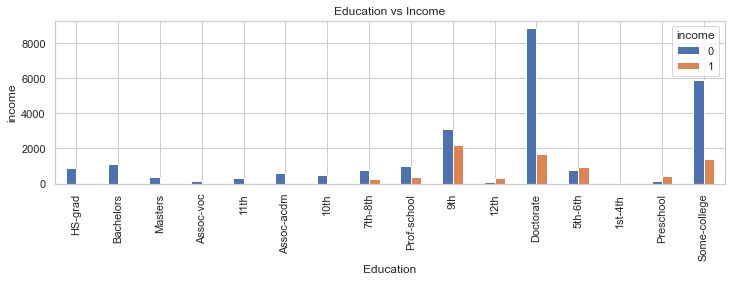

In [ ]:
%matplotlib inline
pd.crosstab(new_df.education,new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('income')
positions = (0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15)
labels = ("HS-grad"           
,"Bachelors"      
,"Masters"        
,"Assoc-voc"      
,"11th"           
,"Assoc-acdm"     
,"10th"           
,"7th-8th"        
,"Prof-school"    
,"9th"            
,"12th"           
,"Doctorate"      
,"5th-6th"        
,"1st-4th"        
,"Preschool"
,"Some-college")
plt.xticks(positions, labels)
plt.savefig('education')


In [ ]:
df.groupby(['income','sex']).mean()

age         fnlwgt  education-num  capital-gain  \
income sex                                                          
0      0    36.210801  185999.381359       9.820475    121.986134   
       1    37.146890  193101.249752       9.451907    165.591062   
1      0    42.125530  183687.406277      11.787108   4200.389313   
       1    44.625788  188769.101321      11.580606   3971.765836   

            capital-loss  hours-per-week  native-country  
income sex                                                
0      0       47.364470       35.916701        0.102377  
       1       56.810537       40.693925        0.114960  
1      0      173.648855       40.426633        0.090755  
       1      198.780396       46.366106        0.084509

In [ ]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

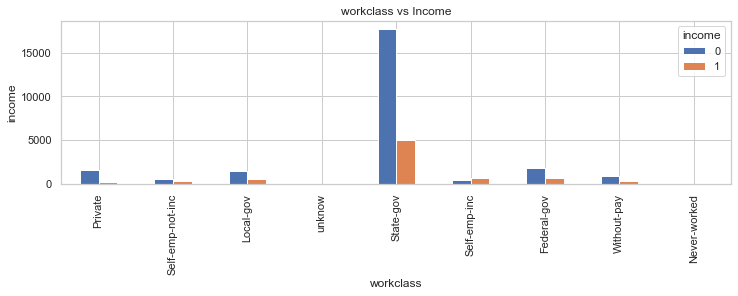

In [ ]:
%matplotlib inline
pd.crosstab(new_df.workclass,new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('workclass vs Income')
plt.xlabel('workclass')
plt.ylabel('income')
positions = (0, 1, 2, 3, 4,5,6,7,8)
labels = ("Private"           
,"Self-emp-not-inc"      
,"Local-gov"        
,"unknow"      
,"State-gov"           
,"Self-emp-inc"     
,"Federal-gov"           
,"Without-pay"        
,"Never-worked")
plt.xticks(positions, labels)
plt.savefig('workclass')

In [ ]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

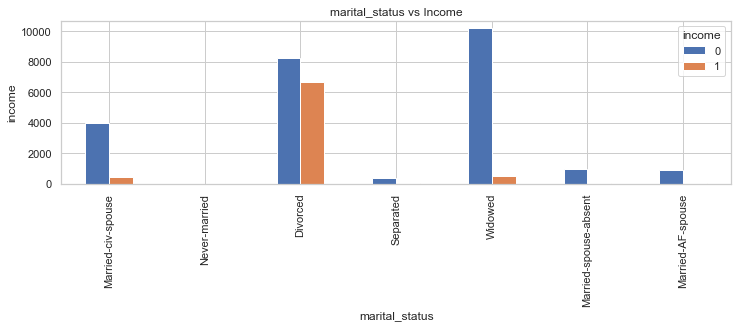

In [ ]:
%matplotlib inline
pd.crosstab(new_df['marital-status'],new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('marital_status vs Income')
plt.xlabel('marital_status')
plt.ylabel('income')
positions = (0, 1, 2, 3, 4,5,6)
labels = ("Married-civ-spouse"           
,"Never-married"      
,"Divorced"        
,"Separated"      
,"Widowed"           
,"Married-spouse-absent"     
,"Married-AF-spouse")
plt.xticks(positions, labels)
plt.savefig('marital_status')

In [ ]:
new_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

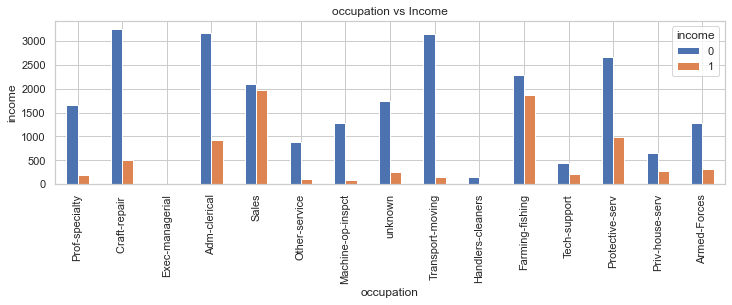

In [ ]:
%matplotlib inline
pd.crosstab(new_df.occupation,new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('occupation vs Income')
plt.xlabel('occupation')
plt.ylabel('income')
positions = (0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14)
labels = ("Prof-specialty"           
,"Craft-repair "      
,"Exec-managerial"        
,"Adm-clerical"      
,"Sales"           
,"Other-service"     
,"Machine-op-inspct"           
,"unknown"        
,"Transport-moving"    
,"Handlers-cleaners"            
,"Farming-fishing"           
,"Tech-support"      
,"Protective-serv"               
,"Priv-house-serv"
,"Armed-Forces")
plt.xticks(positions, labels)
plt.savefig('occupation')

In [ ]:
new_df['relationship'].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

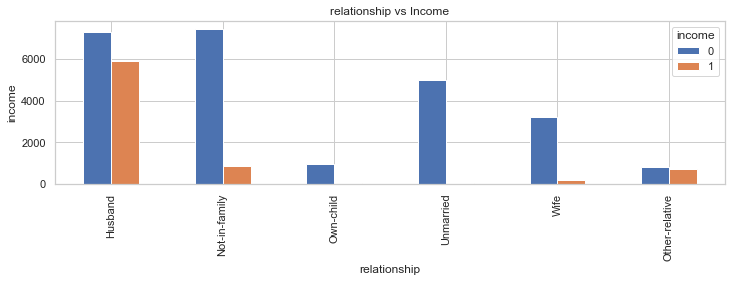

In [ ]:
%matplotlib inline
pd.crosstab(new_df['relationship'],new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('relationship vs Income')
plt.xlabel('relationship')
plt.ylabel('income')
positions = (0, 1, 2, 3, 4,5)
labels = ("Husband"           
,"Not-in-family"      
,"Own-child"        
,"Unmarried"      
,"Wife"           
,"Other-relative")
plt.xticks(positions, labels)
plt.savefig('relationship')

In [ ]:
new_df['sex'].value_counts()

1    21789
0    10771
Name: sex, dtype: int64

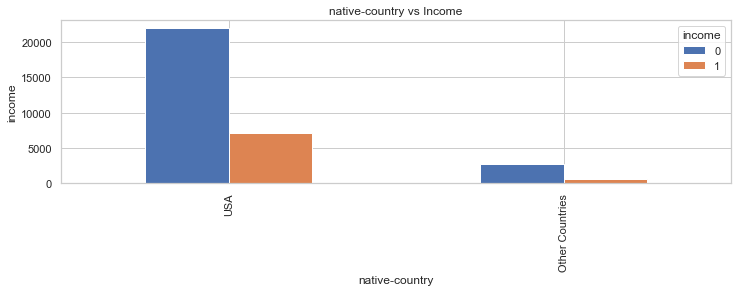

In [ ]:
%matplotlib inline
pd.crosstab(new_df['native-country'],new_df.income).plot(kind='bar',figsize=(12, 3))
plt.title('native-country vs Income')
plt.xlabel('native-country')
plt.ylabel('income')
positions = (0, 1)
labels = ("USA","Other Countries")
plt.xticks(positions, labels)
plt.savefig('native-country')

### Summary from Frequency charts:

- Gender : 
    * have neutral impact on income prediction

### Summary from Age distribution:
   - Age is distributed between 20-90
   - Max concentration is between 20-40

## Lets see Correlation of Numerical Attributes. Introducing heatmap 

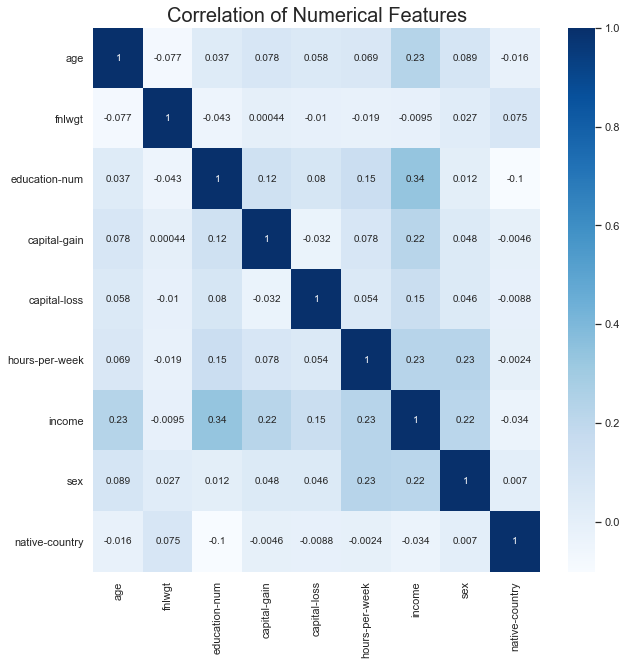

In [ ]:
#Plotting for the numerical features
numerical_attributes = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income','sex','native-country']
fig, ax = plt.subplots(figsize=(10, 10))
p = sns.heatmap(new_df[numerical_attributes].corr(), annot=True, cmap="Blues")
plt.title("Correlation of Numerical Features", fontsize=20)
plt.show()

In [ ]:
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,0,40,0,0


In [ ]:
## Dimesionality reduction and Making marital-status column as Binary
new_df['marital-status'] = new_df['marital-status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
new_df['marital-status'] = new_df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
new_df['marital-status'] = new_df['marital-status'].map({'Married':1, 'Single':0})

In [ ]:
new_df['relationship'] = new_df['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

### Lets check correlation between Relation and Marital status

In [ ]:
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,1,1,0,0,13,0,0
1,38,Private,215646,HS-grad,9,0,Handlers-cleaners,0,1,0,0,40,0,0
2,53,Private,234721,11th,7,1,Handlers-cleaners,1,1,0,0,40,0,0
3,28,Private,338409,Bachelors,13,1,Prof-specialty,1,0,0,0,40,1,0
4,37,Private,284582,Masters,14,1,Exec-managerial,1,0,0,0,40,0,0


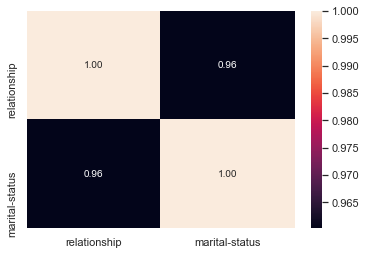

In [ ]:
g = sns.heatmap(new_df[['relationship', 'marital-status']].corr(),annot=True, fmt = ".2f")
plt.show()

### we can see relationship and Marital Status are highly correlated so lets drop relationship

In [ ]:
new_df.drop(labels=["relationship"], axis = 1, inplace = True)

In [ ]:
new_df.drop(labels=["fnlwgt"], axis = 1, inplace = True)

In [ ]:
# Education and Education-num are redundant variables both providing the same info so lets remove eductaion
new_df.drop(labels=["education"], axis = 1, inplace = True)

In [ ]:
new_df['marital-status'] = new_df['marital-status'].astype(int)

In [ ]:
new_df.head()

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,13,1,Exec-managerial,1,0,0,13,0,0
1,38,Private,9,0,Handlers-cleaners,1,0,0,40,0,0
2,53,Private,7,1,Handlers-cleaners,1,0,0,40,0,0
3,28,Private,13,1,Prof-specialty,0,0,0,40,1,0
4,37,Private,14,1,Exec-managerial,0,0,0,40,0,0


In [ ]:
cat_vars=['workclass','occupation']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(new_df[var], prefix=var)
    data1=new_df.join(cat_list)
    new_df=data1

In [ ]:
cat_vars=['workclass','occupation']
new_data=new_df.columns.values.tolist()
to_keep=[i for i in new_data if i not in cat_vars]

print (to_keep)


['age', 'education-num', 'marital-status', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']


In [ ]:
data_final=new_df[to_keep]
data_final.columns.values

array(['age', 'education-num', 'marital-status', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving'],
      dtype=object)

In [ ]:
data_final.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,50,13,1,1,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,38,9,0,1,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,53,7,1,1,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,28,13,1,0,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,37,14,1,0,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


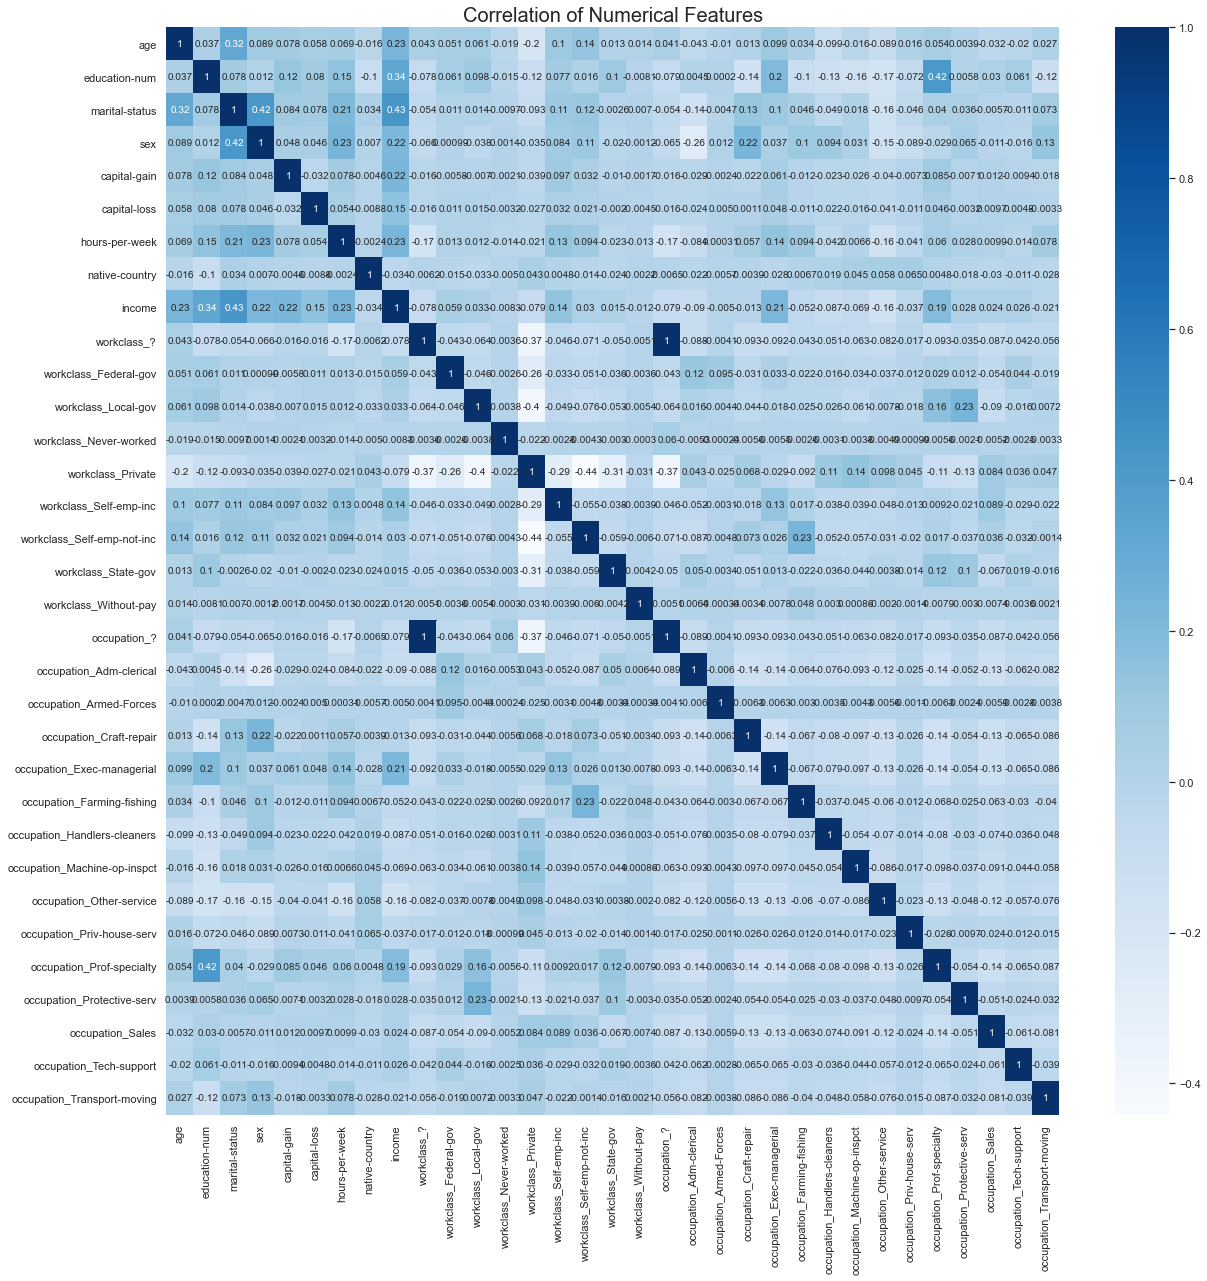

In [ ]:
#Plotting for the numerical features
numerical_attributes_new = ['age', 'education-num', 'marital-status', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving']
fig, ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(data_final[numerical_attributes_new].corr(), annot=True, cmap="Blues")
plt.title("Correlation of Numerical Features", fontsize=20)
plt.show()

In [ ]:
data_final.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,50,13,1,1,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,38,9,0,1,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,53,7,1,1,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,28,13,1,0,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,37,14,1,0,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Removing work_class_? and occupation_? as their correlation is 1 . Also this two represent bad data quality

In [ ]:
data_final.drop(labels=["workclass_?"], axis = 1, inplace = True)

In [ ]:
data_final.drop(labels=["occupation_?"], axis = 1, inplace = True)

## Splitting the Data into train and Test Split. test size keeping as 30%. Random state is defined which maintains shuffles of the data 

In [ ]:
X = data_final.drop(labels=['income'], axis=1)
y = data_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=143)

In [ ]:
print ("Total Data count:" ,data_final.shape[0])
print ("Data count for X_train:" ,X_train.shape[0])
print ("Data count for X_test:" ,X_test.shape[0])
print ("Data count for y_train:" ,y_train.shape[0])
print ("Data count for y_test:" ,y_test.shape[0])

Total Data count: 32560
Data count for X_train: 22792
Data count for X_test: 9768
Data count for y_train: 22792
Data count for y_test: 9768


### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2.224439,-0.419139,1.053648,0.707223,-0.146993,-0.216359,-2.229777,-0.340182,-0.176557,-0.263333,-0.016227,-1.519995,-0.189861,-0.288119,-0.202054,-0.021974,-0.363726,-0.019875,-0.376295,-0.378116,-0.178921,-0.211060,-0.254457,-0.339298,-0.069,-0.378268,-0.144473,-0.355714,-0.171064,-0.226904
1,-0.554974,-0.807632,1.053648,-1.413981,-0.146993,-0.216359,-0.035609,-0.340182,-0.176557,-0.263333,-0.016227,-1.519995,-0.189861,-0.288119,4.949182,-0.021974,-0.363726,-0.019875,-0.376295,-0.378116,-0.178921,-0.211060,-0.254457,-0.339298,-0.069,-0.378268,-0.144473,-0.355714,5.845754,-0.226904
2,0.030166,1.134830,1.053648,0.707223,-0.146993,-0.216359,0.370719,-0.340182,-0.176557,-0.263333,-0.016227,0.657897,-0.189861,-0.288119,-0.202054,-0.021974,2.749321,-0.019875,-0.376295,-0.378116,-0.178921,-0.211060,-0.254457,-0.339298,-0.069,-0.378268,-0.144473,-0.355714,-0.171064,-0.226904
3,-0.262404,-0.030647,-0.949083,-1.413981,-0.146993,-0.216359,-0.035609,-0.340182,-0.176557,-0.263333,-0.016227,0.657897,-0.189861,-0.288119,-0.202054,-0.021974,-0.363726,-0.019875,-0.376295,-0.378116,-0.178921,-0.211060,-0.254457,2.947263,-0.069,-0.378268,-0.144473,-0.355714,-0.171064,-0.226904
4,-0.847544,-0.419139,-0.949083,0.707223,-0.146993,-0.216359,-0.035609,-0.340182,-0.176557,-0.263333,-0.016227,0.657897,-0.189861,-0.288119,-0.202054,-0.021974,-0.363726,-0.019875,-0.376295,-0.378116,-0.178921,4.737991,-0.254457,-0.339298,-0.069,-0.378268,-0.144473,-0.355714,-0.171064,-0.226904


### Starting of Model Implementation

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))
result=logit_model.fit()
print(result.summary())

         Current function value: 0.390313
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                32560
Model:                          Logit   Df Residuals:                    32531
Method:                           MLE   Df Model:                           28
Date:                Sun, 07 Mar 2021   Pseudo R-squ.:                  0.2929
Time:                        22:57:44   Log-Likelihood:                -12709.
converged:                      False   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -0.0196      0.001    -17.000      0.000      -0.022      -0.017
education-n

### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
logreg = LogisticRegression()
y_pred = model.predict(X_test)
logreg.fit(X_train, y_train)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 85.15561015561015%
[[6890  536]
 [ 914 1428]]


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy on test set: 0.85


## Compute precision, recall, F-measure and support

In [ ]:
print("Classification Report for Logistic Regression")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7426
           1       0.73      0.61      0.66      2342

    accuracy                           0.85      9768
   macro avg       0.80      0.77      0.78      9768
weighted avg       0.85      0.85      0.85      9768



### Accuracy of 0.85 with f1_score [0.9,0.6] in Logistic Regression

## ROC Curve Analysis

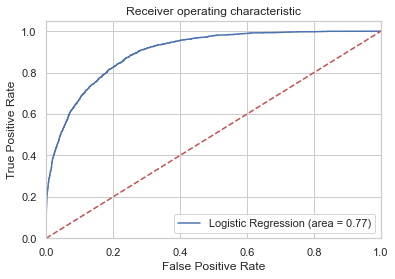

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
y_pred = model.predict(X_test)
logreg.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. Area under the roc curve (AUC) helps to conclude that a classifier is excellent. In this case area=0.77. which means our classifier is good and there is 77% chance that our model will predict the correct outcome

#### Note: An AUC above 0.85 means high classification accuracy, one between 0.75 and 0.85 moderate accuracy, and one less than 0.75 low accuracy

# Logistic Regression Completed :)

## Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
### Lets check the accuracy in Decision Tree as well :)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction for Decision Tree:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[6522  904]
 [ 922 1420]]
Accuracy of prediction for Decision Tree: 0.813


In [ ]:
print("Classification Report for Decision tree")
print(classification_report(y_test, predictions))

Classification Report for Decision tree
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7426
           1       0.61      0.61      0.61      2342

    accuracy                           0.81      9768
   macro avg       0.74      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768



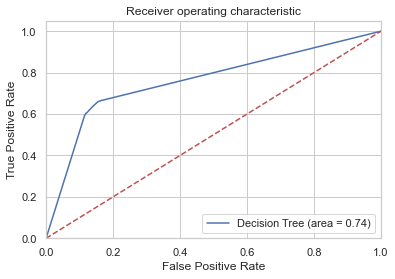

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dtree_ROC')
plt.show()

### Accuracy for Decision Tree: 0.812 = 81.2%
### Area=0.74
## Note: Its Not better than Logistic regression

## Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
### Lets check the accuracy in Random Forest as well :)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 1.41 s, sys: 28.2 ms, total: 1.44 s
Wall time: 1.44 s


RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the income for the X_test data.**

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction for Random Forest:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[6762  664]
 [ 883 1459]]
Accuracy of prediction for Random Forest: 0.842


In [ ]:
print("Classification Report for Random Forest")
print(classification_report(y_test, rfc_pred))

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7426
           1       0.69      0.62      0.65      2342

    accuracy                           0.84      9768
   macro avg       0.79      0.77      0.78      9768
weighted avg       0.84      0.84      0.84      9768



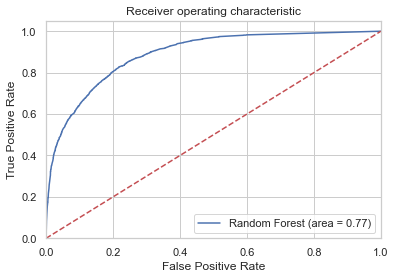

In [ ]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn import preprocessing
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
rforest_auc_score = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rforest_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('random_forest_ROC')
plt.show()

### Accuracy is 0.842
### In this case area=0.77. which means our classifier is good and there is 77% chance that our model will predict the correct outcome .

### XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

## Let's code XGBoost as well :)

In [ ]:
import xgboost as bgb

In [ ]:
clf= bgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

Accuracy:  0.8702907452907452
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7426
           1       0.77      0.66      0.71      2342

    accuracy                           0.87      9768
   macro avg       0.83      0.80      0.81      9768
weighted avg       0.87      0.87      0.87      9768



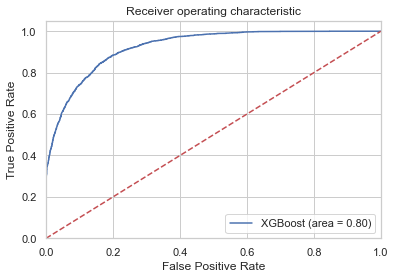

In [ ]:
xg_auc_score = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xg_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xg_auc_score')
plt.show()

### Accuracy is 0.87
### In this case area=0.80. which means our classifier is good and there is 80% chance that our model will predict the correct outcome .

# Using PCA Lets Perform some EDA and check the change in Accuracy

In [ ]:

X = data_final.drop(labels=['income'], axis=1)
y = data_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=143)

In [ ]:
a = pd.DataFrame(X_train)
a.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
30946,69,9,1,1,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17878,31,8,1,0,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
27715,39,13,1,1,0,0,45,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21855,35,10,0,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22073,27,9,0,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Dimensionality Reduction using PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(a)
colnames = list(a.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,1.437389e-04,0.002074,age
1,4.496362e-05,0.000521,education-num
2,5.805264e-06,0.000092,marital-status
3,3.156663e-06,0.000049,sex
4,9.999983e-01,0.001829,capital-gain
5,-1.829612e-03,0.999995,capital-loss
6,1.388267e-04,0.001579,hours-per-week
7,2.120184e-07,-0.000004,native-country
8,-7.806697e-08,0.000004,workclass_Federal-gov
9,-4.928719e-07,0.000008,workclass_Local-gov


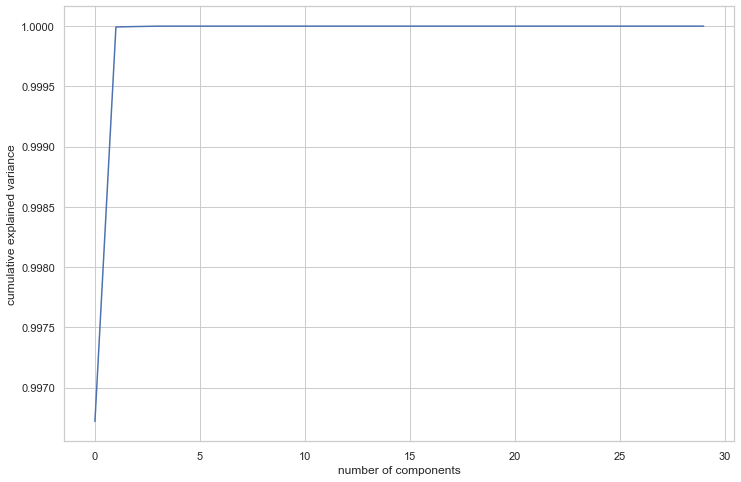

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9768, 2)

In [ ]:
## Logistic regression with hyperparameter tunning
lr = LogisticRegression()
grid_values = {'penalty': ['l2'], 'C': [0.01,0.1,1,10,100]}
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
model_lr = GridSearchCV(lr, param_grid=grid_values)


train_poly = poly.fit_transform(X_train)
x_test_ploy = poly.transform(X_test)

model_lr.fit(train_poly, y_train)
y_pred = model_lr.predict(x_test_ploy)

print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.8008804258804259


### Logistic Regression using PCs and Hyper paramter tunning gives accuracy of 80%

# Overall Result of Various Algorithms

| Algorithm | Accuracy
| :-:  | :-: |
| Random Forest | 0.844
| Decision Tree | 0.814
| Logistic Regression| 0.85
| xgBoost| 0.87
| Logistic Regression using PCs and Hyper paramter tunning | 0.80

# For this data clearly we can see XGBoost Classifier Gave the Highest Accuracy of 87% and AUC Score of 0.80 .

Note: We were not able to open the refference link given in the Dataset webpage.